<a href="https://colab.research.google.com/github/lorenzo1285/-scalable-machine-learning-with-apache-spark-english/blob/Published-v3.8.2/TIR_VAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy-financial

In [ ]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

¿Cuál será el valor presente de $11,600 invertidos nueve meses antes, a una tasa de 24% capitalizable mensualmente? (Valor Presente Neto / TIR)

In [ ]:
c = -11600 # Capital 
i = .24/12 # Tasa de interes capitalizable mensualmente
n = 9 # Numero de periodos

In [ ]:
datos_1 = {'Flujo de Caja': [-11600,-650000,50500,123250,125320,135400,
                           185450,190500,195000,200000]}
df_1 = pd.DataFrame(data= datos_1)
df_1

,Flujo de Caja
0,-11600
1,-650000
2,50500
3,123250
4,125320
5,135400
6,185450
7,190500
8,195000
9,200000


In [ ]:
PV = npf.pv(fv=c, rate=i, nper=n, pmt=0, when='end')
PV.round(5)

9706.36108

In [ ]:
TIR_1 = round(npf.irr(values=df_1['Flujo de Caja']),5)
TIR_1

0.12937

Determinar el VAN y la TIR de una inversión cuyo flujo de caja por ocho años es el siguiente:

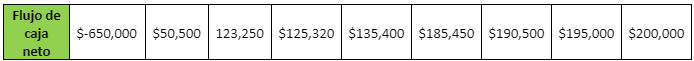

El financiamiento en el mercado es de 7.5%. ¿Debe realizar la inversión? Argumenta tu respuesta a partir de los materiales revisados en la unidad. 



In [ ]:
datos = {'Flujo de Caja': [-650000,50500,123250,125320,135400,
                           185450,190500,195000,200000]}
df = pd.DataFrame(data= datos)
df

,Flujo de Caja
0,-650000
1,50500
2,123250
3,125320
4,135400
5,185450
6,190500
7,195000
8,200000


In [ ]:
VAN = npf.npv(rate=.075, values=df['Flujo de Caja'])
VAN.round(5)

188185.35894

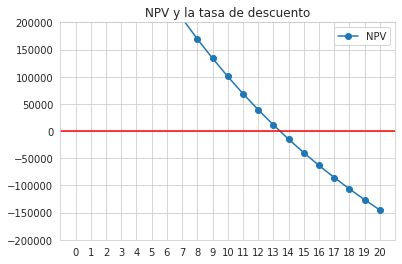

In [ ]:
# Graficando el NPV en función de la tasa de descuento
def npv_irr(tasas):
    result = []
    for tasa in tasas:
        result.append(npf.npv(tasa/100,df['Flujo de Caja']))
    return result

tasas = list(range(21))

plt.title("NPV y la tasa de descuento")
plt.plot(tasas, npv_irr(tasas), marker='o', label='NPV')
plt.axhline(0, color='red')
axes = plt.gca()
axes.set_ylim([(df['Flujo de Caja'].max()*-1),df['Flujo de Caja'].max()])
plt.xticks(tasas)
plt.legend(loc='upper right')
plt.show()

In [ ]:
TIR = round(npf.irr(values=df['Flujo de Caja']),5)
TIR

0.13425

In [ ]:
(TIR/.075)-1

0.7900000000000003

In [ ]:
npf.pv(rate=.12, nper=10, pmt=100, fv=1000, when='end')

-886.9955394317828

In [ ]:
npf.fv(rate=.12, nper=10, pmt=100, pv=-887, when='end')

1000.0138538478056

"¿Cuántos años tardara un depósito de 1,000 usd a una tasa de 8% anual, en crecer hasta $2, 500 usd?"

In [ ]:
npf.nper(rate=.08, pv=-1000,pmt=0, fv=2500, when='end')

/usr/local/lib/python3.7/dist-packages/numpy_financial/_financial.py:296: RuntimeWarning: divide by zero encountered in long_scalars
  A = -(fv + pv)/(pmt+0)


array(11.90590354)


"Suponga que deposita $100 en su cuenta que le paga 8% capitalizable semestralmente, si el dinero lo deja 2 años ¿Cuánto tendrá al final del 2do año?"

In [ ]:
npf.fv(rate=.04, nper=4,pmt=0, pv=-100, when='end')

116.98585600000003

"¿Cuál es el rendimiento de una máquina de juegos ""El Conquistador"" si cuando se compró hace un año fue en 20,000 y actualmente tiene un valor de mercado de 21,500 y durante el año genero ingresos en efectivo después de impuestos por $800?"

In [ ]:
datos_1 = [-20000, 800, 1500]
npf.irr(datos_1, )

-0.7054093956450804

In [ ]:
1500+800

2300

In [ ]:
2300/20000

0.115

3 = .15

x = 1

In [ ]:
3/.15

20.0

In [ ]:
.02/.1

0.19999999999999998